<a href="https://colab.research.google.com/github/Dethkalleon/MLKublik/blob/main/%D0%9A%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%D0%95%D0%98_%D0%9C%D0%9B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛР 1.1 - Линейная регрессия

### Цель работы

Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.

### Содержание работы

1. Загрузить данные из тектовых файлов.
2. Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.
3. Оценить на графике качество построенной модели.
4. Построить кривые обучения.

### Выполнение

Импортируем необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считаем предоставленные датасеты и посмотрим что там лежит

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [ ]:
type(x)

pandas.core.frame.DataFrame

Здесь нас не устраивает сгенерированный столбец с индексами, а также, что тип объекта - DataFrame. У нас парная регрессия, поэтому было бы удобно работать со столбцами - Series. Исправим

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']
x.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


Отобразим график зависимости y от x

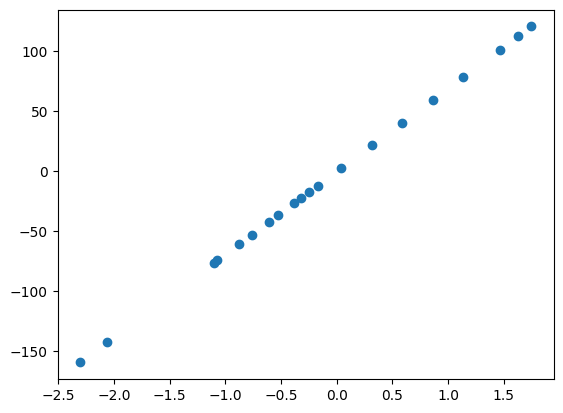

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

График очень похож на линейный - значит продолжаем использовать парную линейную регрессию.

Опишем класс модели

In [ ]:
"""Модель парной линейной регрессии"""
class Model(object):
    """
    Конструктор класса
    """
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    """
    Предсказывает значение целевой переменной при текущих параметрах.

    :param x: фактор
    :return: значение выходной переменной
    """
    def predict(self, x):
      return self.b0 + self.b1 * x

    """
    Рассчитывает функцию ошибки MSE (mean squared error) для
    текущих параметрах регрессии.

    :param X: фактор, по которому будет делаться предсказание
    :param Y: реальное значение целевой переменной
    :return: значение функции ошибки
    """
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    """
    Обучение модели методом градиентного спуска.

    :param X: фактор, по которому будет делаться предсказание
    :param Y: реальное значение целевой переменной
    """
    def fit(self, X, Y):
        alpha = 0.1 # Скорость обучения
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

Создадим объект модели обучения и посмотрим на начальное значение ошибки

In [ ]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


Начальная ошибка: 2937

Изобразим нашу необученную регрессию

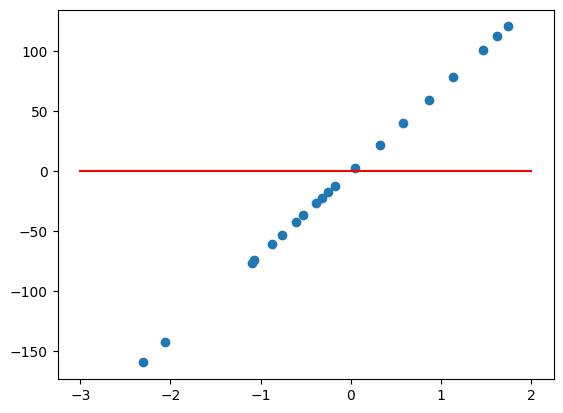

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Обучим с помощью градиентного спуска нашу модель

In [ ]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


Ошибка после одной итерации обучения (после 1 шага) уменьшилась, но нас всё ещё не устраивает. Убедимся в этом с помощью графика

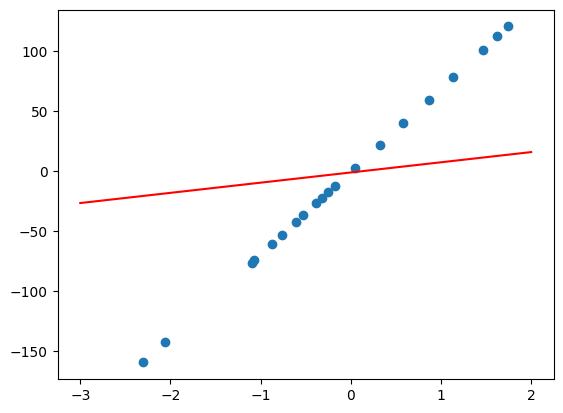

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

* Модифицируем конструктор, чтобы задавать произвольные исходные параметры модели
* Добавим больше итераций обучения
* Добавим возврат списка ошибок и номера итерации
* Добавим пару строк для адаптивной скорости обучения

In [ ]:
"""Модель парной линейной регрессии"""
class Model(object):
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        steps, errors = [1], [self.error(X, Y)]
        for step in range(2, max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)

            steps.append(step + 1)
            errors.append(new_err)
        return steps, errors

Протестируем

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.039530336184190835


Отлично, ошибка сильно уменьшилась и близка к нулю. Посмотрим на график

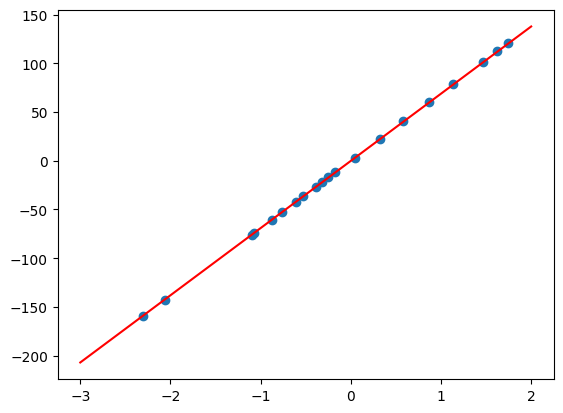

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Линия регрессии довольно похожа на оптимальную. Посмотрим на ошибку регрессии на разных итерациях

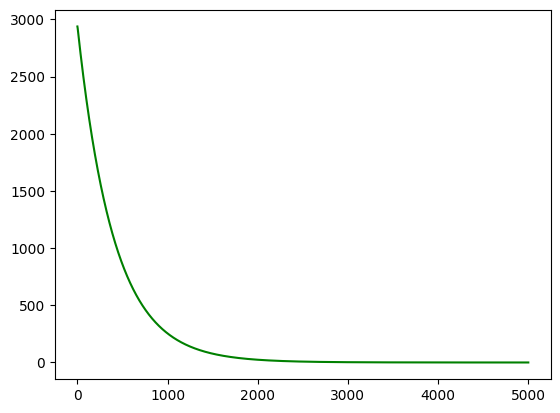

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

### Задания для самостоятельного выполнения

#### Задание 1
Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [ ]:
def print_and_fit(model: Model):
  J = model.error(x, y)
  print(f"Model initial parameters: b0 = {model.b0}, b1 = {model.b1}")
  print("initial error:", J)
  steps, errors = model.fit(x, y, alpha=1)
  J = model.error(x, y)
  print("error after gradient descent:", J)
  print()

А теперь проверим начальную ошибку и ошибку после обучения при разных исходных параметрах:

In [ ]:
hyp1 = Model() #b0, b1 = 0, 0
print_and_fit(hyp1)

hyp2 = Model(b0 = 100, b1 = 100)
print_and_fit(hyp2)

hyp3 = Model(b0 = 0, b1 = 1)
print_and_fit(hyp3)

hyp4 = Model(b0 = 1234567, b1 = -98765)
print_and_fit(hyp4)

Model initial parameters: b0 = 0, b1 = 0
initial error: 2937.6446095153397
error after gradient descent: 2.5879568071906823e-29

Model initial parameters: b0 = 100, b1 = 100
initial error: 5171.698197339665
error after gradient descent: 2.532243505759448e-29

Model initial parameters: b0 = 0, b1 = 1
initial error: 2853.3401853653986
error after gradient descent: 2.5879568071906823e-29

Model initial parameters: b0 = 1234567, b1 = -98765
initial error: 784345186504.1245
error after gradient descent: 2.532243505759448e-29



Как видно выше, при разных начальных параметрах модели сходятся

#### Задание 2
Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
hyp = Model(b0 = 1234567, b1 = -98765)
steps, errors = hyp.fit(x, y, alpha=10, max_steps=100)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 1.2753630771170266e+222


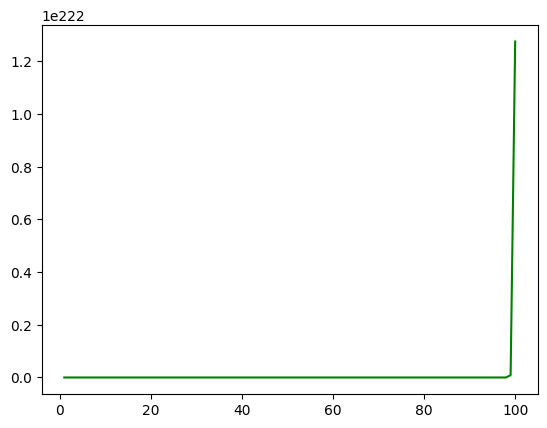

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

#### Задание 3
Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [ ]:
"""Модель парной линейной регрессии"""
class Model(object):
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1

    def getSeries(self, data):
      return data["0"] if isinstance(data, pd.DataFrame) else data

    def predict(self, X):
        X = self.getSeries(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self.getSeries(X)
        Y = self.getSeries(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        X = self.getSeries(X)
        Y = self.getSeries(Y)
        steps, errors = [1], [self.error(X, Y)]
        for step in range(2, max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)

            steps.append(step + 1)
            errors.append(new_err)
        return steps, errors

In [ ]:
x_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)
y_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)
type(x_df)

pandas.core.frame.DataFrame

Проверим работоспособность на новом типе

In [ ]:
hyp = Model()
J = hyp.error(x_df, y_df)
print("initial error:", J)
steps, errors = hyp.fit(x_df, y_df, alpha=1)
J = hyp.error(x_df, y_df)
print("error after gradient descent:", J)

initial error: 2937.6446095153397
error after gradient descent: 2.5879568071906823e-29


Проверим, что не сломали функционал с Series

In [ ]:
hyp = Model()
J = hyp.error(x, y)
print("initial error:", J)
steps, errors = hyp.fit(x, y, alpha=1)
J = hyp.error(x, y)
print("error after gradient descent:", J)

initial error: 2937.6446095153397
error after gradient descent: 2.5879568071906823e-29


#### Задание 4
Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.


In [ ]:
"""Модель парной линейной регрессии"""
class Model(object):
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1

    def getSeries(self, data):
      return data["0"] if isinstance(data, pd.DataFrame) else data

    def predict(self, X):
        X = self.getSeries(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self.getSeries(X)
        Y = self.getSeries(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        X = self.getSeries(X)
        Y = self.getSeries(Y)
        steps, errors = [1], [self.error(X, Y)]
        for step in range(2, max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)
            old_err = errors[-1]

            steps.append(step + 1)
            errors.append(new_err)

            if new_err < 0.000001:
              break
        return steps, errors

Проверим

In [ ]:
hyp = Model()
J = hyp.error(x, y)
print("initial error:", J)
steps, errors = hyp.fit(x, y, alpha=1)
J = hyp.error(x, y)
print("error after gradient descent:", J)

initial error: 2937.6446095153397
error after gradient descent: 5.004251093279586e-07


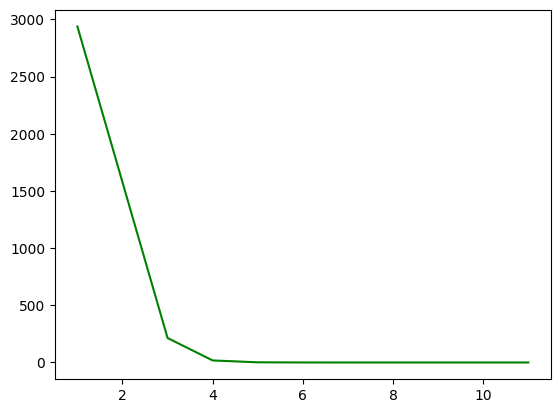

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Как видно из графика, нам понадобилось всего лишь 12 итераций для нормального обучения

#### Задание 5
Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов

Случай, если ошибка перестает существенно меняться, уже проверен выше. Теперь проверим второй случай

In [ ]:
hyp = Model()
J = hyp.error(x, y)
print("initial error:", J)
steps, errors = hyp.fit(x, y, alpha=0.0001)
J = hyp.error(x, y)
print("error after gradient descent:", J)

initial error: 2937.6446095153397
error after gradient descent: 855.5112877221975


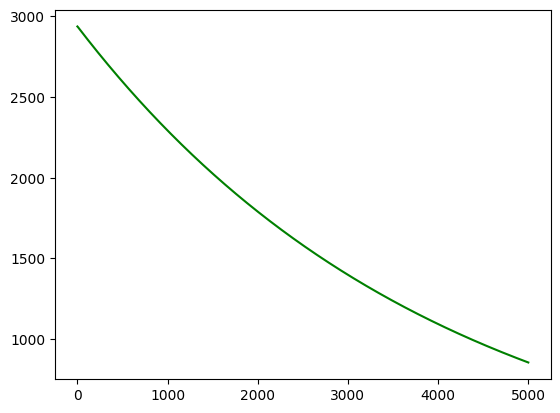

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

#### Задание 6
Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [ ]:
"""Модель парной линейной регрессии"""
class Model(object):
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1

    def getSeries(self, data):
      return data["0"] if isinstance(data, pd.DataFrame) else data

    def predict(self, X):
        X = self.getSeries(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self.getSeries(X)
        Y = self.getSeries(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=1, max_steps=5000):
        X = self.getSeries(X)
        Y = self.getSeries(Y)
        steps, errors = [1], [self.error(X, Y)]
        for step in range(2, max_steps):
            old_b0 = self.b0
            old_b1 = self.b1
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)
            old_err = errors[-1]

            steps.append(step + 1)
            errors.append(new_err)

            if old_err < new_err:
              alpha /= 2
              self.b0 = old_b0
              self.b1 = old_b1

            if new_err < 0.000001:
              break
        return steps, errors

In [ ]:
hyp = Model(b0 = 1234567, b1 = -98765)
steps, errors = hyp.fit(x, y, alpha=10, max_steps=100)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 7.359418316571377e-07


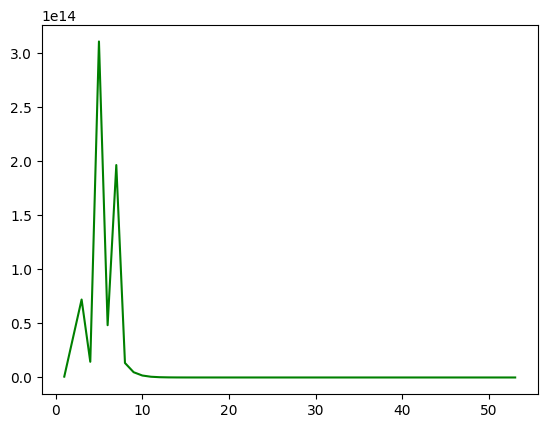

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

#### Задание 7
Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных

In [ ]:
"""Модель парной линейной регрессии"""
class Model(object):
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1

    def getSeries(self, data):
      return data["0"] if isinstance(data, pd.DataFrame) else data

    def predict(self, X):
        X = self.getSeries(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self.getSeries(X)
        Y = self.getSeries(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=1, max_steps=5000):
        X = self.getSeries(X)
        Y = self.getSeries(Y)
        steps, errors = [1], [self.error(X, Y)]
        for step in range(2, max_steps):
            old_b0 = self.b0
            old_b1 = self.b1
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)
            old_err = errors[-1]

            steps.append(step + 1)
            errors.append(new_err)

            if old_err < new_err:
              alpha /= 2
              self.b0 = old_b0
              self.b1 = old_b1

            if new_err < 0.000001:
              break
        return steps, errors

    def plot(self, X, Y):
        X = self.getSeries(X)
        Y = self.getSeries(Y)

        x_min, x_max = X.min(), X.max()
        x_range = x_max - x_min
        X_plot = np.linspace(x_min - 0.1 * x_range, x_max + 0.1 * x_range, 100)
        Y_plot = self.predict(X_plot)

        plt.figure()
        plt.scatter(X, Y, label="Данные")
        plt.plot(X_plot, Y_plot, color='red', label="Линия регрессии")

        plt.show()

    def error_plot(self, steps, errors):
      plt.figure()
      plt.plot(steps, errors, 'g')
      plt.show()

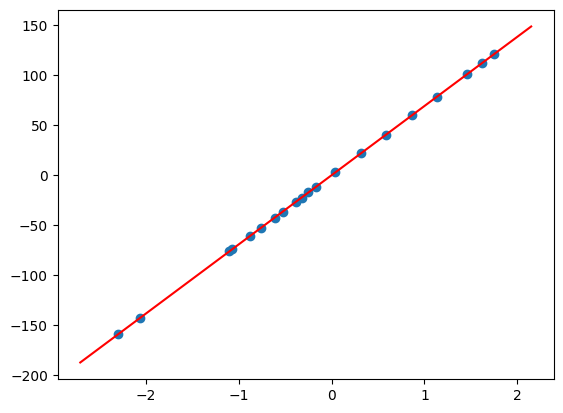

In [ ]:
hyp = Model(b0 = 1234567, b1 = -98765)
steps, errors = hyp.fit(x, y)
hyp.plot(x, y)

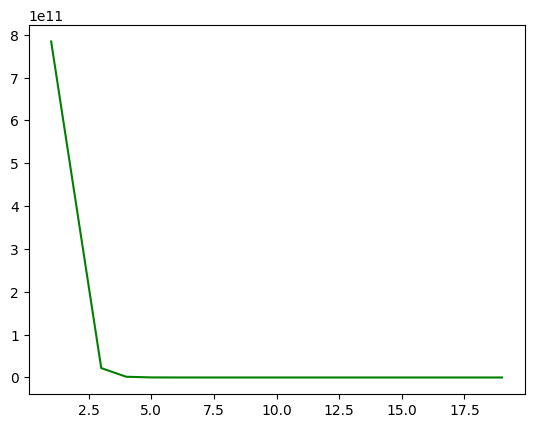

In [ ]:
hyp.error_plot(steps, errors)

# ЛР 1.2 - Множественная регрессия

### Цель работы
Познакомиться с основными приемами работы с множественными регрессионными моделями с использованием библиотеки sklearn.

### Содержание работы
1. Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).
2. Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк. Выведите первые строки датасета.
3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.
4. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.
Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

### Выполнение

Стандартный импорт необходимых библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считаем данные

In [ ]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv")

Посмотрим, что там лежит

In [ ]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


Первая строка с данными pandas воспринял как заголовок. Исправим

In [ ]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)
x.shape, y.shape

((387, 5), (387, 1))

Что можем заметить:

*   У нас представлено 387 объектов
*   У каждого объекта представлено 5 иксов (атрибутов/признаков) и 1 игрик (целевая переменная)

Создадим объект модели линейной регрессии из библиотеки sklearn


In [ ]:
from sklearn.linear_model import LinearRegression
binary = LinearRegression()

Для начала мы построим модель парной регрессии от одного из признаков в датасете. Для этого из матрицы атрибутов нужно вытащить один столбец.

Можно сделать это так: `x[1]`, но таким образом мы получим Series - одномерный массив. Библиотечные средства предполагают, что X - это двумерный массив.

Превратить его в двумерный можно многими разными способами, но в Pandas можно взять несколько столбцов из датафрейма. Такая операция вернет всегда именно датафрейм. А нам нужен датафрейм из одного столбца. Сделать это можно так: `x[[1]]`.

Итак, возьмем один столбец и обучим парную регрессию его с целевой переменной

In [ ]:
binary.fit(x[[1]], y)

binary.coef_

array([[95.52010745]])

In [ ]:
binary.intercept_

array([0.00332092])

По умолчанию коэффициенты при аргументах находятся в поле coef\_. Свободный член (bias/отклонение) находится в поле intercept\_.

Метод predict() рассчитывает теоретические значения признака. Выведем первые 5

In [ ]:
binary.predict(x[[1]])[:5]

array([[ 81.7066754 ],
       [-40.45008468],
       [-24.60472955],
       [-78.92903986],
       [-82.26167214]])

Построим график. Точки построим так:

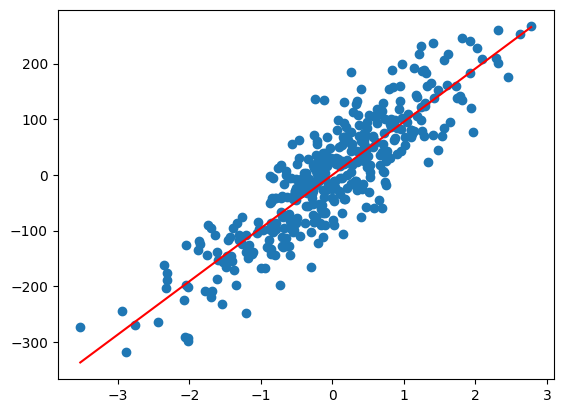

In [ ]:
plt.scatter(x[1], y) # Построение точек

"""
linspace создаёт равномерное распределение

В нашем случае мы равномерно распределяем 100 точек от минимального до
максимального по X

Уже по этим точкам рассчитаем модельные значения
"""
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
"""
xx.shape до reshape - (100,) - одномерный массив из 100 элементов
xx.reshape((-1, 1)).shape - (100, 1) - двумерный массив из 1 столбца и 100 строк
"""
plt.plot(xx, binary.predict(xx), c='r')

Посмотрим на коэффициент детерминации (R2-score) модели

In [ ]:
binary.score(x[[1]], y)

0.7699743283650629

Для построения множественной регрессии выполним те же шаги, но будем использовать полный датасет

In [ ]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

 scatter:
 Каждая точка на графике представляет одну строку (один пример) из данных.

Положение точки:
   * По оси X (горизонтальной) откладывается предсказанное значение (yy).
   * По оси Y (вертикальной) откладывается фактическое значение (y).

Если модель предсказывает идеально, то все точки лягут точно на прямую линию, где предсказанное значение равно фактическому (то есть, на линию y = x).

Линия plot: Линия идеальных предсказаний

Эта линия - линия идеальных предсказаний. Она используется как ориентир для оценки диаграммы рассеяния. Она показывает, где должны были бы находиться точки, если бы предсказанные значения совпадали с фактическими.

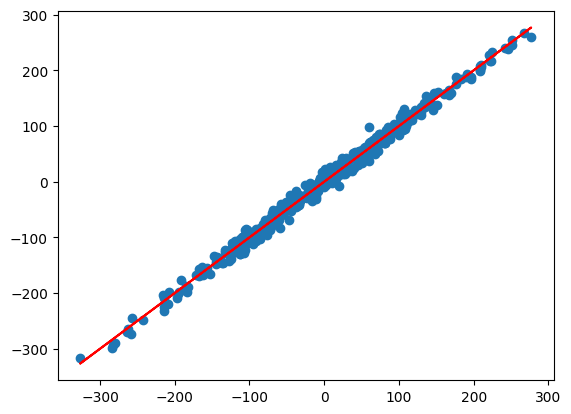

In [ ]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

### Задания для самостоятельного выполнения

#### Задание 1

Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

In [ ]:
# x.shape - (387, 5) - 387 строк, 5 столбцов

for i in range(x.shape[1]):
  binary = LinearRegression().fit(x[[i]], y)
  print(binary.score(x[[i]], y))

0.04364336234689348
0.7699743283650629
0.18794528514998887
0.047470345664983093
0.00017176151145947838


Построили парные регрессии от каждого атрибута. Также дополнительно вывели коэффициент детерминации для каждой модели

#### Задание 2
Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.


In [ ]:
"""Модель парной линейной регрессии"""
class Model(object):
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1

    def getSeries(self, data, column: int):
      return data[column] if isinstance(data, pd.DataFrame) else data

    def predict(self, X, column=0):
        X = self.getSeries(X, column)
        return self.b0 + self.b1 * X

    def error(self, X, Y, column=0):
        X = self.getSeries(X, column)
        Y = self.getSeries(Y, 0)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, column=0, alpha=1, max_steps=5000):
        X = self.getSeries(X, column)
        Y = self.getSeries(Y, 0)
        steps, errors = [1], [self.error(X, Y)]
        for step in range(2, max_steps):
            old_b0 = self.b0
            old_b1 = self.b1
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)
            old_err = errors[-1]

            steps.append(step + 1)
            errors.append(new_err)

            if old_err < new_err:
              alpha /= 2
              self.b0 = old_b0
              self.b1 = old_b1

            if new_err < 0.000001:
              break
        return steps, errors

    def plot(self, X, Y):
        X = self.getSeries(X)
        Y = self.getSeries(Y)

        x_min, x_max = X.min(), X.max()
        x_range = x_max - x_min
        X_plot = np.linspace(x_min - 0.1 * x_range, x_max + 0.1 * x_range, 100)
        Y_plot = self.predict(X_plot)

        plt.figure()
        plt.scatter(X, Y, label="Данные")
        plt.plot(X_plot, Y_plot, color='red', label="Линия регрессии")

        plt.show()

    def error_plot(self, steps, errors):
      plt.figure()
      plt.plot(steps, errors, 'g')
      plt.show()

Обучим на 4-ом столбце


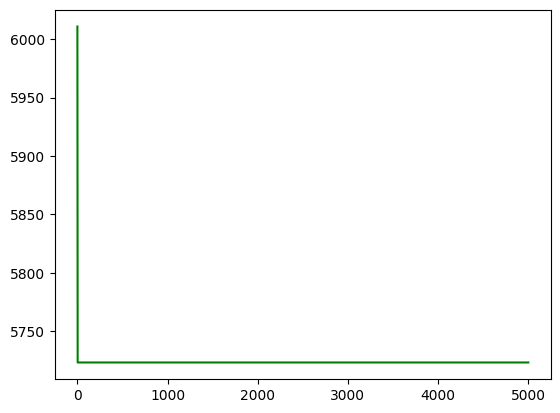

In [ ]:
binary3 = Model()
steps, errors = binary3.fit(x, y, column=3)
binary3.error_plot(steps, errors)

Видно, что выполнились все 5000 итераций обучения, но ошибка, всё ещё очень высока

#### Задание 3 и Задание 4
Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def polynomial_regression(x: pd.Series, y: pd.Series, degree: int):
  poly = PolynomialFeatures(degree=degree)
  x_poly = poly.fit_transform(x.values.reshape(-1, 1))
  # Преобразовали признак к полиному
  """
  x_poly.shape = (387, 3) для полинома 2ой степени
  x_poly.shape = (387, 4) для полинома 3ей степени
  x_poly.shape = (387, 11) для полинома 10ой степени
  """

  x_train, x_test, y_train, y_test = train_test_split(
      x_poly, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)
  print(f"Коэффициент детерминации для полинома степени {degree}: {model.score(x_test, y_test)}")

In [ ]:
degrees = [2, 3, 10]  # Степени полинома

for feature in x.columns:
    print(f"\nПризнак: {feature}")
    for degree in degrees:
        polynomial_regression(x[feature], y, degree)


Признак: 0
Коэффициент детерминации для полинома степени 2: 0.051623086517020855
Коэффициент детерминации для полинома степени 3: 0.051228704082298404
Коэффициент детерминации для полинома степени 10: 0.02148510191093911

Признак: 1
Коэффициент детерминации для полинома степени 2: 0.8478585449005506
Коэффициент детерминации для полинома степени 3: 0.8512891098751143
Коэффициент детерминации для полинома степени 10: -19.94666715745276

Признак: 2
Коэффициент детерминации для полинома степени 2: 0.10712158491159596
Коэффициент детерминации для полинома степени 3: 0.103903034654249
Коэффициент детерминации для полинома степени 10: 0.09907931479748178

Признак: 3
Коэффициент детерминации для полинома степени 2: 0.03998287810897716
Коэффициент детерминации для полинома степени 3: 0.03844295485308635
Коэффициент детерминации для полинома степени 10: 0.0057758266328507

Признак: 4
Коэффициент детерминации для полинома степени 2: -0.0027233368087238308
Коэффициент детерминации для полинома ст

R^2 = 0 означает, что модель объясняет столько же дисперсии, сколько и простое предсказание среднего значения y.

Есть отрицательный R^2 - модель предсказывает хуже, чем если бы мы просто всегда предсказывали среднее значение y для всех точек. Это признак переобучения

#### Задание 5
Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.


Модифицируем функцию. Добавим:

Среднюю абсолютную ошибку (Mean Absolute Error) - показывает среднюю величину ошибки в исходных единицах измерения.



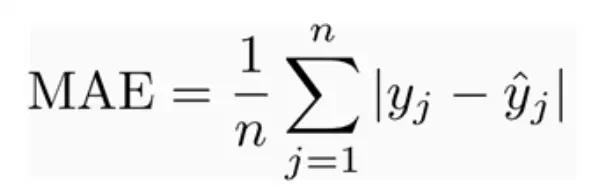

Медианную абсолютную ошибку (Median Absolute Error) - подходит, когда в данных много выбросов. Похоже на MAE

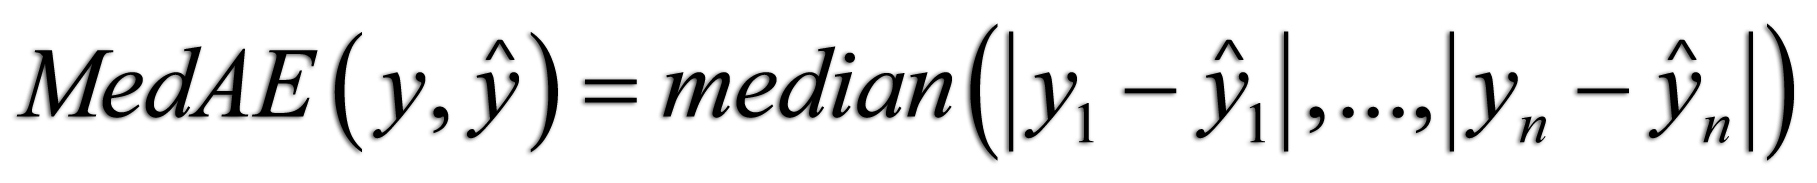

In [ ]:
from sklearn.metrics import mean_absolute_error, median_absolute_error

In [ ]:
def polynomial_regression(x: pd.Series, y: pd.Series, degree: int):
  poly = PolynomialFeatures(degree=degree)
  x_poly = poly.fit_transform(x.values.reshape(-1, 1))

  x_train, x_test, y_train, y_test = train_test_split(
      x_poly, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  r2 = model.score(x_test, y_test)
  mae = mean_absolute_error(y_test, y_pred)
  medae = median_absolute_error(y_test, y_pred)

  print(f"Полином степени {degree}")
  print(f"Коэффициент детерминации: {r2}")
  print(f"MAE: {mae}")
  print(f"Med AE: {medae}")

In [ ]:
degrees = [2, 3, 10]  # Степени полинома

for feature in x.columns:
    print(f"\nПризнак: {feature}")
    for degree in degrees:
        polynomial_regression(x[feature], y, degree)


Признак: 0
Полином степени 2
Коэффициент детерминации: 0.051623086517020855
MAE: 97.07330898010585
Med AE: 77.1678310277618
Полином степени 3
Коэффициент детерминации: 0.051228704082298404
MAE: 97.12582886176865
Med AE: 76.84245926826752
Полином степени 10
Коэффициент детерминации: 0.02148510191093911
MAE: 98.8442931857765
Med AE: 76.16697262217214

Признак: 1
Полином степени 2
Коэффициент детерминации: 0.8478585449005506
MAE: 38.34747222703687
Med AE: 27.295782478959197
Полином степени 3
Коэффициент детерминации: 0.8512891098751143
MAE: 38.09866490931933
Med AE: 28.746800745141257
Полином степени 10
Коэффициент детерминации: -19.94666715745276
MAE: 104.73412195603211
Med AE: 34.91098936267309

Признак: 2
Полином степени 2
Коэффициент детерминации: 0.10712158491159596
MAE: 95.36250601895922
Med AE: 77.07201079688915
Полином степени 3
Коэффициент детерминации: 0.103903034654249
MAE: 95.57804858707502
Med AE: 76.691956542063
Полином степени 10
Коэффициент детерминации: 0.099079314797481

#### Задание 6
Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

Замерим время только для `x[0]`

In [ ]:
import time

In [ ]:
def polynomial_regression(x: pd.Series, y: pd.Series, degree: int):
  poly = PolynomialFeatures(degree=degree)
  x_poly = poly.fit_transform(x.values.reshape(-1, 1))

  x_train, x_test, y_train, y_test = train_test_split(
      x_poly, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  start_time = time.time()

  model.fit(x_train, y_train)

  end_time = time.time()
  elapsed_time = end_time - start_time
  print(f"\nПолином степени {degree} обрабатывался {elapsed_time:.5f} секунд\n")

  y_pred = model.predict(x_test)

  r2 = model.score(x_test, y_test)
  mae = mean_absolute_error(y_test, y_pred)
  medae = median_absolute_error(y_test, y_pred)

  print(f"Полином степени {degree}")
  print(f"Коэффициент детерминации: {r2}")
  print(f"MAE: {mae}")
  print(f"Med AE: {medae}")

In [ ]:
degrees = [2, 3, 10, 500]

for degree in degrees:
    polynomial_regression(x[0], y, degree)


Полином степени 2 обрабатывался 0.00207 секунд

Полином степени 2
Коэффициент детерминации: 0.051623086517020855
MAE: 97.07330898010585
Med AE: 77.1678310277618

Полином степени 3 обрабатывался 0.00145 секунд

Полином степени 3
Коэффициент детерминации: 0.051228704082298404
MAE: 97.12582886176865
Med AE: 76.84245926826752

Полином степени 10 обрабатывался 0.00166 секунд

Полином степени 10
Коэффициент детерминации: 0.02148510191093911
MAE: 98.8442931857765
Med AE: 76.16697262217214

Полином степени 500 обрабатывался 0.01972 секунд

Полином степени 500
Коэффициент детерминации: -3.158784202125195e+47
MAE: 7.889477451487394e+24
Med AE: 85.08226803722485


Полином 500-ой степени обрабатывался в 11 раз дольше полинома 10-ой степени. Разница между полиномами 2-ой, 3-ей и 10-ой степени минимальна